🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.
 
📝 Tasks
1. Load the dataset and identify the relevant columns.
2. Use:
    Engine size as the input feature
    Car price as the output variable
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with:
Engine size = 200
 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
dataset = pd.read_csv("CarPrice_Assignment.csv")
dataset.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
X = dataset[['enginesize']].values
y = dataset['price'].values


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression MSE: 15465458.965908466
Linear Regression R²: 0.8040958796678975


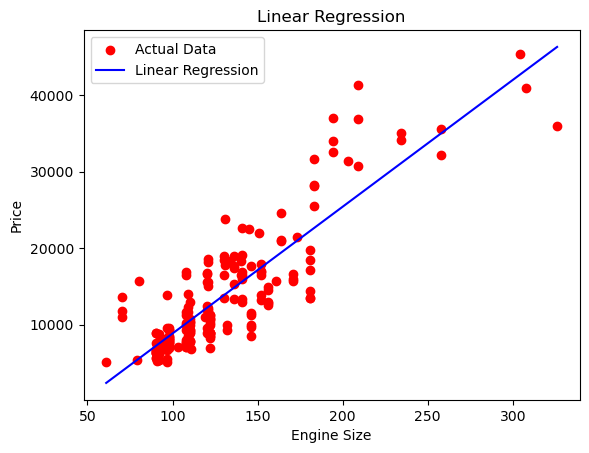

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
X_sorted = np.sort(X, axis=0)

plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_sorted, lin_reg.predict(X_sorted), color='blue', label='Linear Regression')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Linear Regression")
plt.legend()
plt.show()



Polynomial Regression MSE: 11649790.064433012
Polynomial Regression R²: 0.8524297352146281


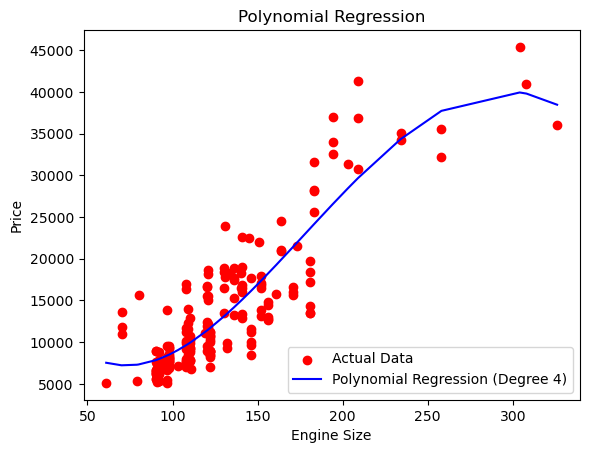

In [80]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)
y_pred_poly = lin_reg_poly.predict(X_test_poly)

print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
X_sorted_poly = poly_reg.transform(X_sorted)

plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_sorted, lin_reg_poly.predict(X_sorted_poly),
         color='blue', label='Polynomial Regression (Degree 4)')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Polynomial Regression")
plt.legend()
plt.show()



In [81]:
engine_size = np.array([[200]])
engine_size_poly = poly_reg.transform(engine_size)

predicted_price = lin_reg_poly.predict(engine_size_poly)

print("Predicted price for engine size 200:", predicted_price[0])


Predicted price for engine size 200: 27806.112010247853


📝 Tasks
1. Load the dataset and identify the relevant columns.
2. Use:
Engine size as the input feature
Car price as the output variable
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with:
Engine size = 200
6. Increase the flexibility of your model and observe how the curve changes.
7. Compare predictions from:
a simple straight-line model
a curved model
8. Analyze which model:
captures the trend better
gives more realistic predictions
9. Evaluate prediction errors and interpret them in business terms.
10. Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?
 

In [82]:
#increase the flexibility of your model and observe how the curve changes
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))


Linear Regression MSE: 15465458.965908466
Linear Regression R²: 0.8040958796678975


In [83]:
degrees = [2, 4, 8]
poly_models = {}
errors = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    poly_models[d] = (poly, model)
    errors[d] = mean_squared_error(y_test, y_pred)
    
    print(f"Polynomial Degree {d} MSE:", errors[d])


Polynomial Degree 2 MSE: 15637882.192005942
Polynomial Degree 4 MSE: 11649790.064433012
Polynomial Degree 8 MSE: 11927088.170948157


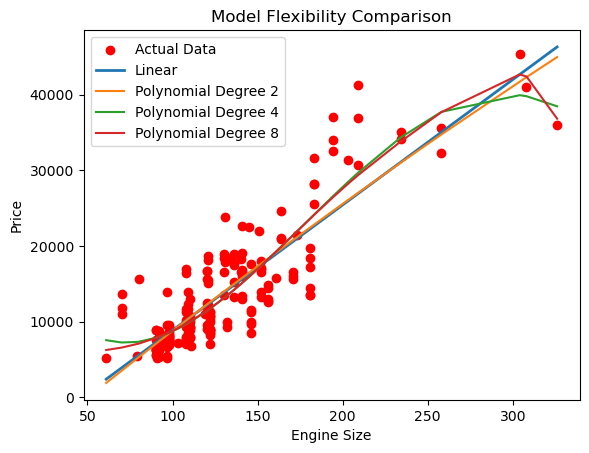

In [84]:
X_sorted = np.sort(X, axis=0)

plt.scatter(X, y, color='red', label='Actual Data')

plt.plot(X_sorted, lin_reg.predict(X_sorted),
         label='Linear', linewidth=2)

for d in degrees:
    poly, model = poly_models[d]
    X_sorted_poly = poly.transform(X_sorted)
    plt.plot(X_sorted, model.predict(X_sorted_poly),
             label=f'Polynomial Degree {d}')

plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Model Flexibility Comparison")
plt.legend()
plt.show()


In [85]:
engine_size = np.array([[200]])

print("\nPredicted Prices for Engine Size = 200")

print("Linear Model:",
      lin_reg.predict(engine_size)[0])

for d in degrees:
    poly, model = poly_models[d]
    pred = model.predict(poly.transform(engine_size))[0]
    print(f"Polynomial Degree {d}:", pred)



Predicted Prices for Engine Size = 200
Linear Model: 25427.147445039867
Polynomial Degree 2: 25565.170876042997
Polynomial Degree 4: 27806.112010247853
Polynomial Degree 8: 27597.706443222814


In [86]:
print("\nError Comparison (Lower is Better)")
print("Linear MSE:", mean_squared_error(y_test, y_pred_lin))

for d in errors:
    print(f"Polynomial Degree {d} MSE:", errors[d])



Error Comparison (Lower is Better)
Linear MSE: 15465458.965908466
Polynomial Degree 2 MSE: 15637882.192005942
Polynomial Degree 4 MSE: 11649790.064433012
Polynomial Degree 8 MSE: 11927088.170948157


In [87]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
y_pred_train= lin_reg.predict(X_train)
print("Linear Regression Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Linear Regression Train R²:", r2_score(y_train, y_pred_train))


Linear Regression MSE: 15465458.965908466
Linear Regression R²: 0.8040958796678975
Linear Regression Train MSE: 14867384.484978024
Linear Regression Train R²: 0.7507055061579612


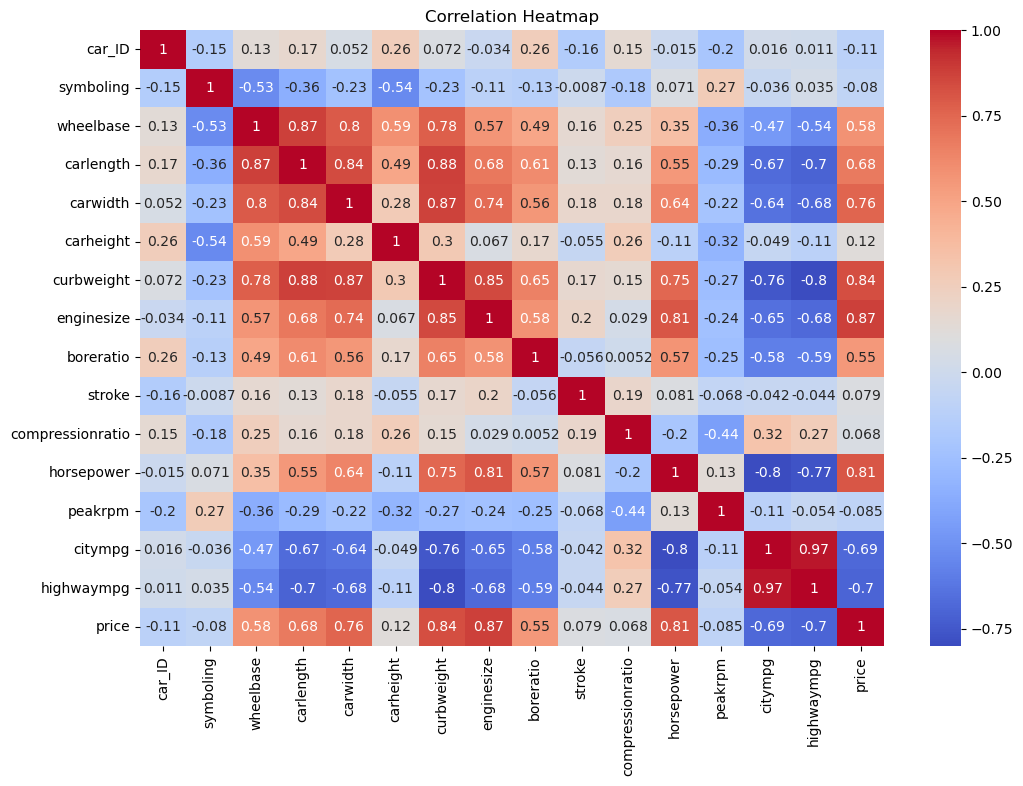

In [88]:
import seaborn as sns
numeric_dataset = dataset.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Strong Positive: 0.7 to 1
Moderate Positive: 0.3 to 0.7
Weak Positive : 0 to 0.3
No correlation: 0(-0.1 to 0.1)
Weak Negative: -0.3 to 0
Moderate Negative: -0.7 to -0.3
Strong Negative: -1.0 to -0.7

### Feature to price relationship
1. CAR_ID: Weak Negative
2. Symboling: Weak Negative
3. Wheelbase: Moderate Positive
4. carlength: Moderate Positive
5. carwidth: Strong Positive
6. carheight: Weak Positive
7. curbweight: Strong Positive
8. enginesize: Strong positive
9. boreratio: Moderate Positive
10. stroke: Weak Positive
11. compressionratio: weak positive
12. horsepower: strong positive
13. peakrpm: Weak negative
14. citympg: Moderate negative
14. highwaympg: Strong Negative


Near to zero: Neglect them.(Weak Positive and Weak negative: )
symboling,carheight,stroke,compressionratio,peakrpm

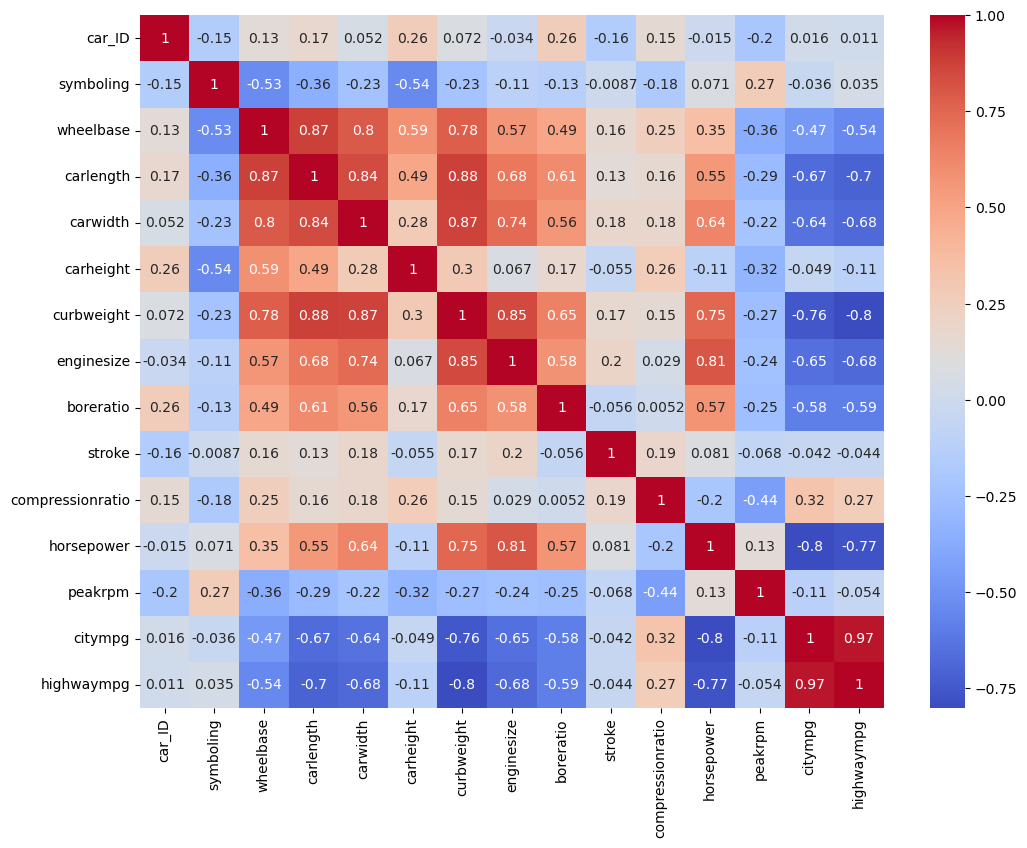

In [89]:
x=dataset.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

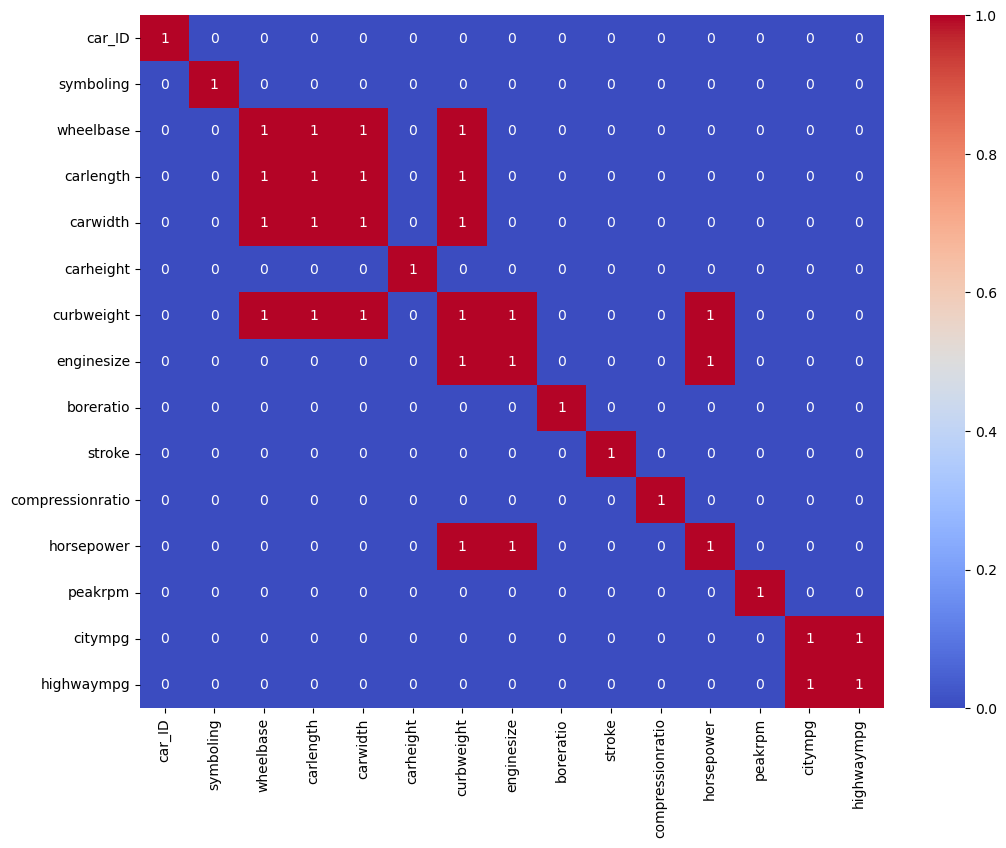

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()

# strong positive and strong neagtive i.e >0.75 and <-0.75

1. wheelbase-carlength=0.87
2. wheelbase-carwidth=0.8
3. wheelbase-curbweight=0.78
4. carlength-carwidth
5. carlength-curbweight
6. carwidth and curbweight
7. curbweight and enginesize
8. curbweight and horsepower
9. enginesize and horsepower
10. citympg and highwaympg


1. curbweight and citympg
2. curbweight and highwaympg
3. horsepower and citympg
4. horsepower and highwaympg


In [94]:
from sklearn.linear_model import Lasso,Ridge
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)   

ridge_model=Ridge(alpha=0.1)
ridge_model.fit(X_train,y_train)
lasso_pred=lasso_model.predict(X_test)
ridge_pred=ridge_model.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R²:", r2_score(y_test, lasso_pred))
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

Lasso Regression MSE: 15465460.922668831
Lasso Regression R²: 0.8040958548812153
Ridge Regression MSE: 15465460.944676524
Ridge Regression R²: 0.8040958546024393


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np
alphas=np.arange(0.1,10,0.05)

model=RidgeCV(alphas=alphas)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))


Best alpha: 7.650000000000002
best score:  0.8515546609886683
